In [3]:
from config import DBNAME
import pandas as pd 
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3 

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# ====================
# БАЗОВЫЕ НАСТРОЙКИ
# ====================
plt.rcParams.update({
    # Размер и разрешение
    'figure.figsize': (10, 6),  # Ширина, высота в дюймах
    'figure.dpi': 100,          # Разрешение для экранов
    'savefig.dpi': 300,         # Разрешение для сохранения
    
    # Шрифты и текст
    'font.size': 12,
    'font.family': 'DejaVu Sans',  # Кроссплатформенный шрифт
    'axes.titlesize': 16,          # Заголовок графика
    'axes.labelsize': 14,          # Подписи осей
    'xtick.labelsize': 12,         # Метки оси X
    'ytick.labelsize': 12,         # Метки оси Y
    'legend.fontsize': 11,         # Легенда
    
    # Цвета и линии
    'axes.facecolor': 'white',     # Фон графика
    'figure.facecolor': 'white',   # Фон фигуры
    'axes.edgecolor': 'black',     # Цвет рамки
    'grid.color': '#e0e0e0',       # Цвет сетки
    
    # Оси и сетка
    'axes.grid': True,             # Отображать сетку
    'grid.linestyle': '--',        # Стиль сетки
    'grid.alpha': 0.7,             # Прозрачность сетки
    
    # Легенда
    'legend.frameon': True,        # Рамка вокруг легенды
    'legend.framealpha': 0.9,      # Прозрачность фона
    'legend.edgecolor': 'black',
    
    # Линии
    'lines.linewidth': 2,          # Толщина линий
    'lines.markersize': 8,         # Размер маркеров
    
    # Гистограммы
    'hist.bins': 'auto',           # Автовыбор корзин для гистограмм
})

In [6]:
TABLE_NAME = DBNAME

In [7]:
try:
    with sqlite3.connect(DBNAME) as conn:
        hh_df = pd.read_sql_query(f"SELECT * FROM full_sql", conn)
except Exception as e:
    print(f'❌ Ошибка: Загрузка данных из БД {e}')

In [8]:
hh_df.published_at = pd.to_datetime(hh_df.published_at)

In [9]:
hh_df.sample()

,vac_id,vac_name,grade,city,geo,geo_city,published_at,archived,employer_id,emp_name,addres,is_accredited,is_trusted,salary_from,salary_to,currency,gross,mode_name,frequency,prof_role,schedule_name,insider_interview,response_letter_required,experience,key_skills,has_test,url,parsed_for_job
655,122115655,Бизнес-аналитик 1С,Middle,Алматы,"[43.2363924, 76.9457275]","[43.2363924, 76.9457275]",2025-06-26 20:49:12+03:00,0,11271107,Полная занятость,,0,1,120207.0,180311.0,RUR,0,За месяц,,Аналитик,Полный день,,0,От 3 до 6 лет,1С; Бизнес-планирование; Системный анализ; Авт...,0,https://hh.ru/vacancy/122115655,Бизнес-аналитик


In [10]:
hh_df.salary_from.describe()


count      1010.000000
mean     122851.901267
std       70458.393754
min         250.000000
25%       70000.000000
50%      101787.360000
75%      160000.000000
max      500000.000000
Name: salary_from, dtype: float64

In [51]:
def capture_figures(title, xlabel=None, ylabel=None):
    plt.title(title) if title else plt.title('')
    plt.xlabel(xlabel) if xlabel else plt.xlabel('')
    plt.ylabel(ylabel) if ylabel else plt.ylabel('')
    plt.show()

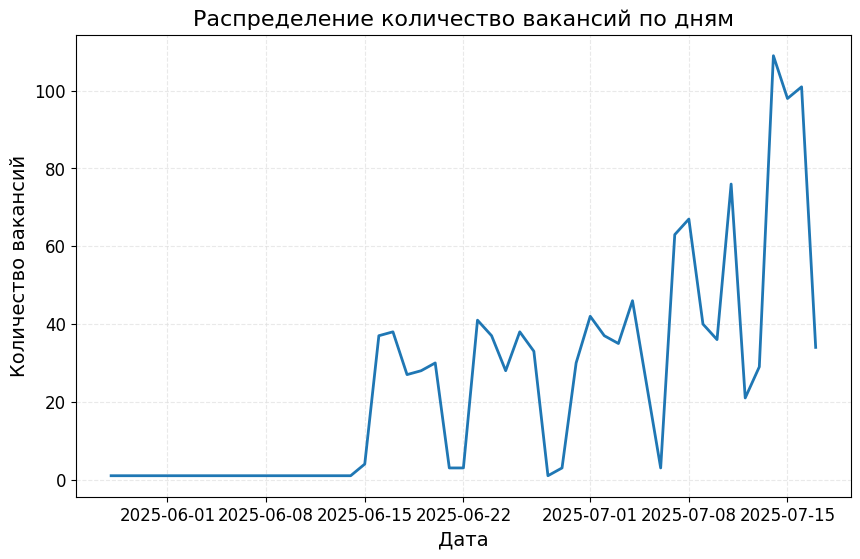

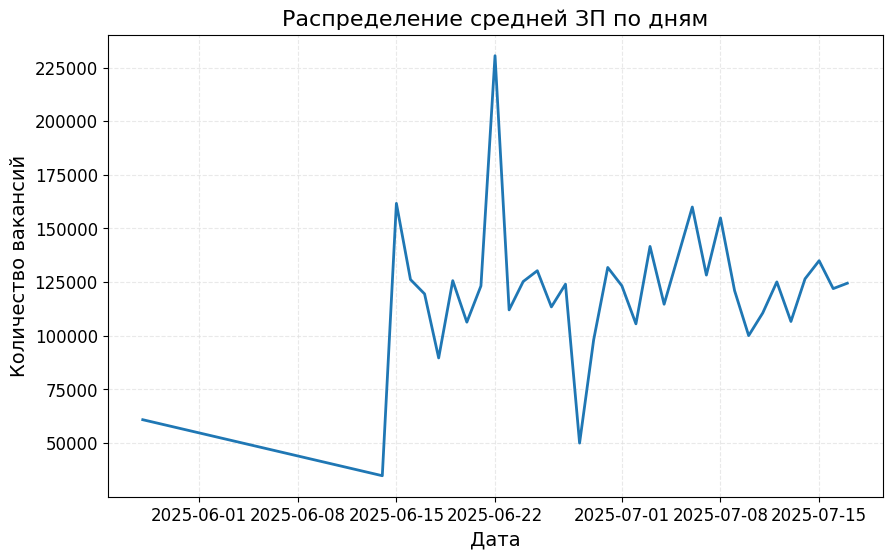

In [125]:
hh_df['j_date'] = hh_df.published_at.dt.date

temp = hh_df.groupby(['j_date']).agg(
    vac_count = ('vac_id','nunique'),
    mean_salary = ('salary_from','mean')
).reset_index().sort_values(by='j_date')


sns.lineplot(data=temp, x='j_date', y='vac_count')
capture_figures('Распределение количество вакансий по дням', 'Дата','Количество вакансий')

sns.lineplot(data=temp, x='j_date', y='mean_salary')
capture_figures('Распределение средней ЗП по дням', 'Дата','Количество вакансий')


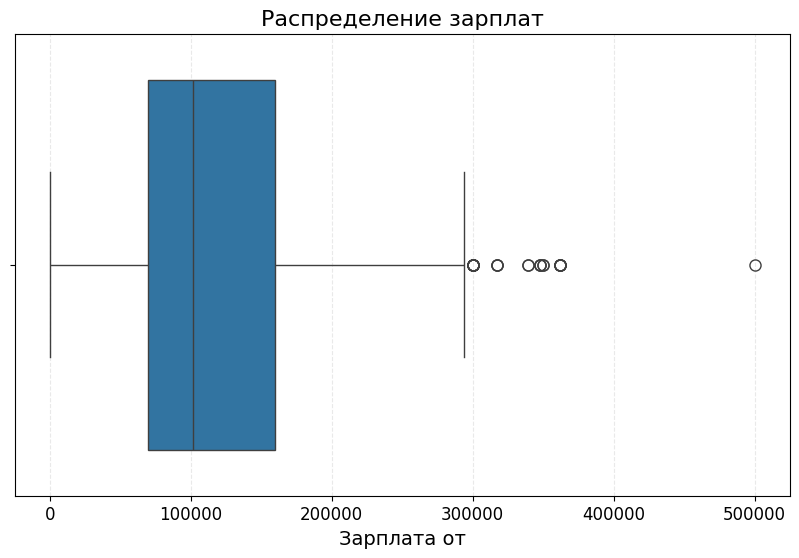

In [13]:
capture_figures('Распределение зарплат', xlabel='Зарплата от')
'Распределение средней ЗП по дням'
sns.boxplot(data = hh_df, x='salary_from')
plt.show()

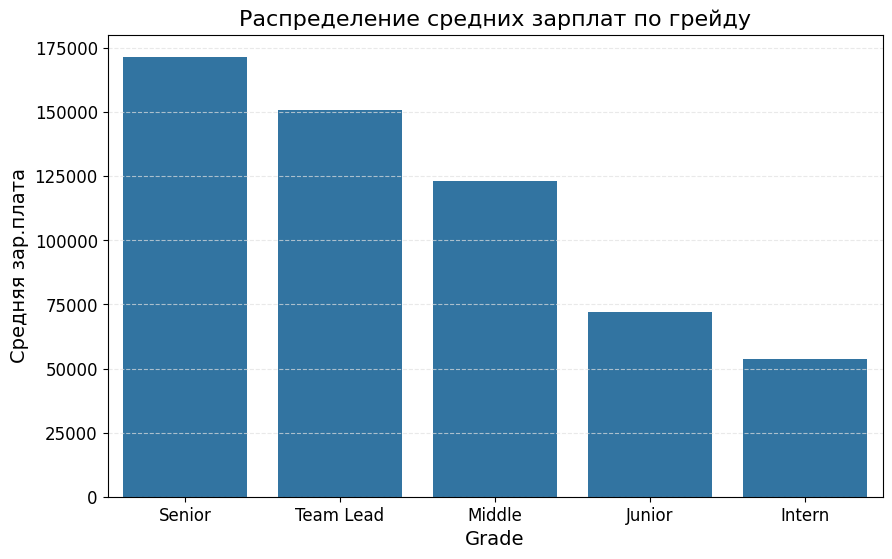

In [ ]:
grade_salary = hh_df.groupby(['grade']).agg(
    mean_salary = ('salary_from','mean'),
    median_salary = ('salary_from','median')
).reset_index().sort_values(by='mean_salary', ascending=False)


sns.barplot(data=grade_salary, y='mean_salary', x='grade')
capture_figures('Распределение средних зарплат по грейду', ylabel='Средняя зар.плата', xlabel='Grade')

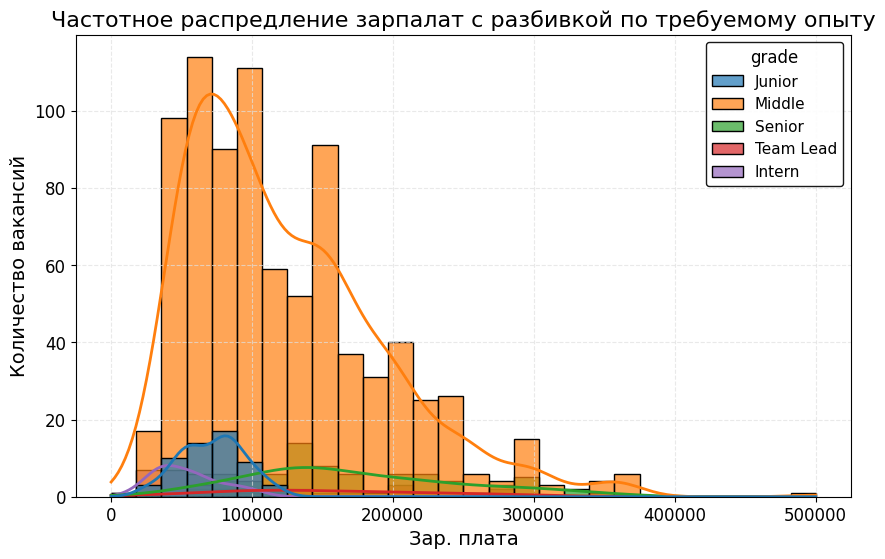

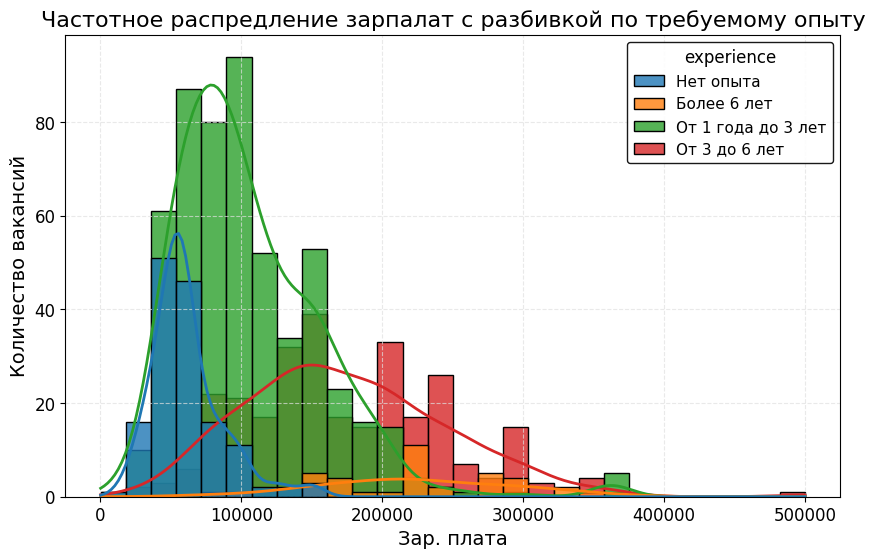

In [104]:
sns.histplot(data=hh_df, x='salary_from', hue='grade', kde=True,  alpha=0.7)
capture_figures('Частотное распредление зарпалат с разбивкой по требуемому опыту', ylabel='Количество вакансий',xlabel='Зар. плата')
sns.histplot(data=hh_df, x='salary_from', hue='experience', kde=True, alpha=0.8)
capture_figures('Частотное распредление зарпалат с разбивкой по требуемому опыту', ylabel='Количество вакансий',xlabel='Зар. плата')

In [18]:
hh_df.sample(1)

,vac_id,vac_name,grade,city,geo,geo_city,published_at,archived,employer_id,emp_name,addres,is_accredited,is_trusted,salary_from,salary_to,currency,gross,mode_name,frequency,prof_role,schedule_name,insider_interview,response_letter_required,experience,key_skills,has_test,url,parsed_for_job,j_date
651,122112453,Бизнес-аналитик (Business Studio),Middle,Москва,"[55.70749282836914, 37.62649154663086]","[55.625578, 37.6063916]",2025-06-26 17:27:48+03:00,0,2374,Полная занятость,"Москва, Гамсоновский переулок, 2",0,1,100000.0,150000.0,RUR,0,За месяц,,Бизнес-аналитик,Полный день,,0,Нет опыта,внимание к деталям; обучаемость; стрессоустойч...,0,https://hh.ru/vacancy/122112453,Бизнес-аналитик,2025-06-26


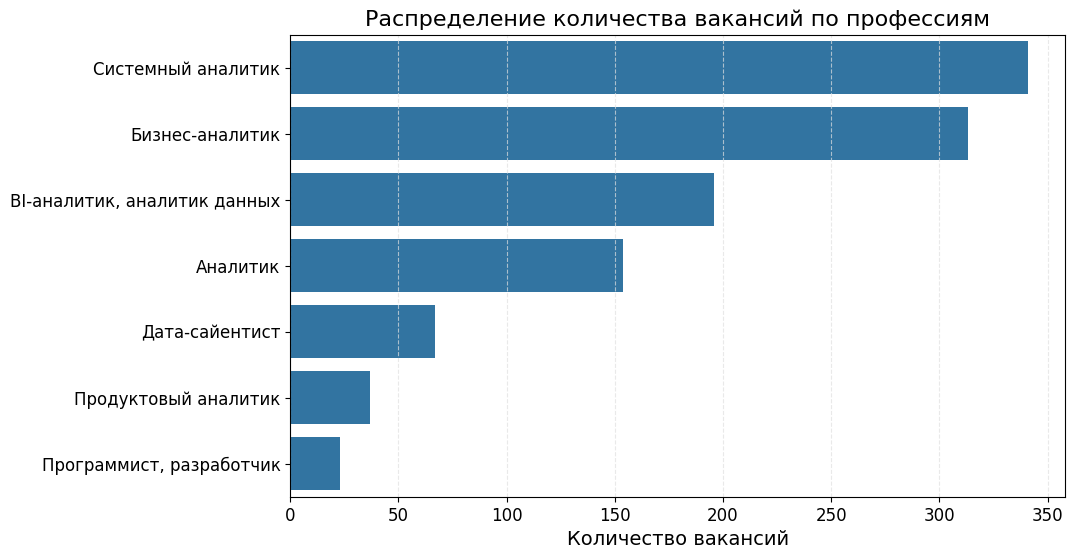

In [ ]:
prof_role_salary = hh_df.groupby('prof_role').agg(
    vac_count = ('vac_id','count'),
    mean_salary = ('salary_from','mean'),
    median_salary = ('salary_from','median')
    ).reset_index().sort_values(by='vac_count', ascending=False).head(7)

sns.barplot(data=prof_role_salary, y='prof_role', x='vac_count' , orient='h')
capture_figures('Распределение количества вакансий по профессиям', xlabel='Количество вакансий')

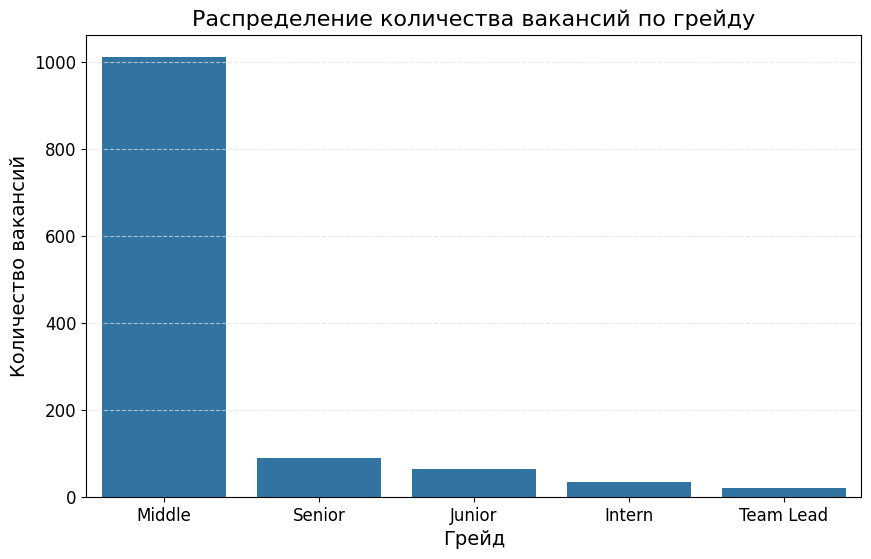

In [138]:
grade_salary = hh_df.groupby(['grade']).agg(
    vac_cnt = ('vac_id','count') ).reset_index().sort_values(by='vac_cnt', ascending=False)

sns.barplot(data=grade_salary, x='grade', y='vac_cnt')
capture_figures('Распределение количества вакансий по грейду', ylabel='Количество вакансий', xlabel='Грейд')

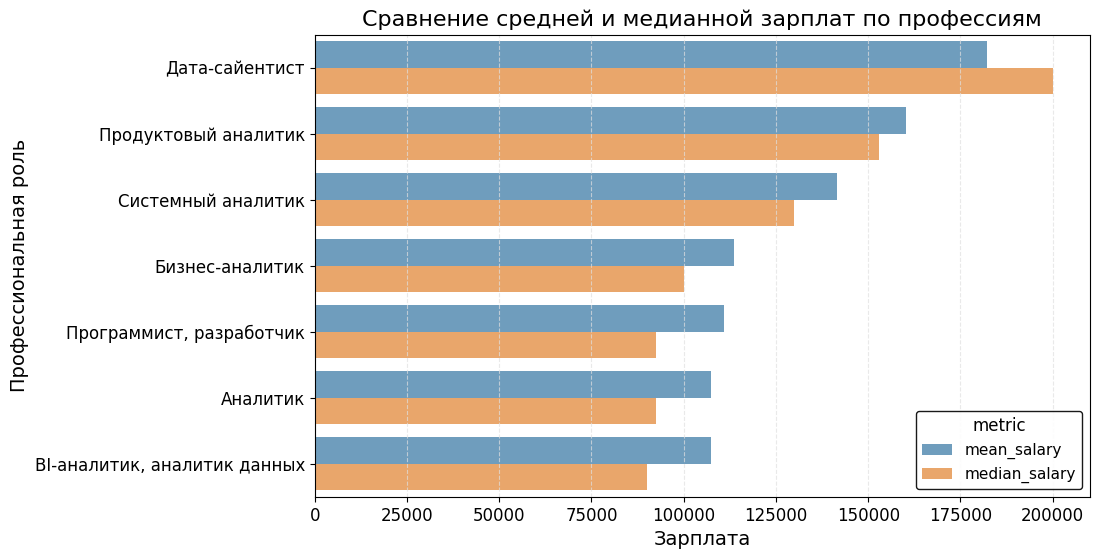

In [107]:
# Преобразуем данные в длинный формат
melted = prof_role_salary.melt(
    id_vars=['prof_role'], 
    value_vars=['mean_salary', 'median_salary'],
    var_name='metric',
    value_name='salary_value'
)

# Сортируем по средней зарплате (сохраняем порядок)
prof_role_order = prof_role_salary.sort_values('mean_salary', ascending=False)['prof_role']
melted['prof_role'] = pd.Categorical(melted['prof_role'], categories=prof_role_order, ordered=True)

sns.barplot(data=melted,y='prof_role', x='salary_value', hue='metric', orient='h', alpha=0.7, palette=['#1f77b4', '#ff7f0e'])

capture_figures(
    'Сравнение средней и медианной зарплат по профессиям', 
    xlabel='Зарплата', 
    ylabel='Профессиональная роль')


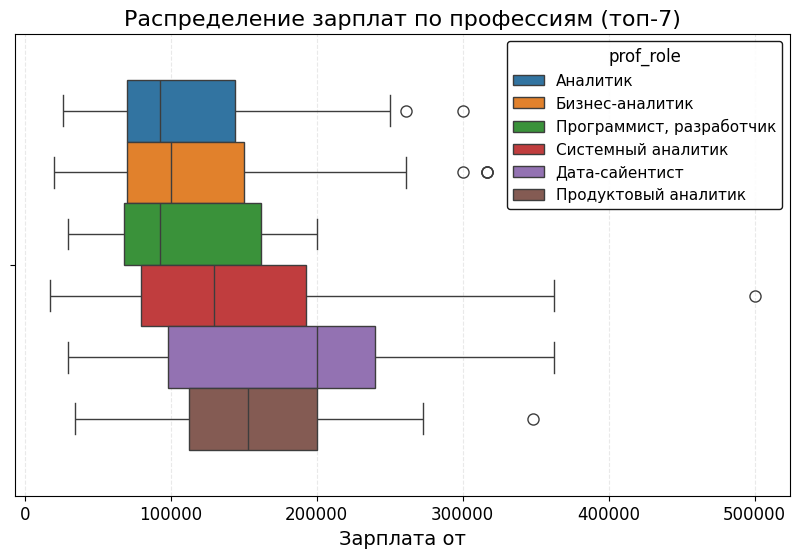

In [127]:
p_role = ['Дата-сайентист',
'Продуктовый аналитик',
'Системный аналитик',
'Бизнес-аналитик',
'Программист, разработчик',
'Аналитик',
'BI-аналитик',
'аналитик данных']

sns.boxplot(data=hh_df[hh_df['prof_role'].isin(p_role)], x='salary_from', hue='prof_role')
capture_figures('Распределение зарплат по профессиям (топ-7)', xlabel='Зарплата от')

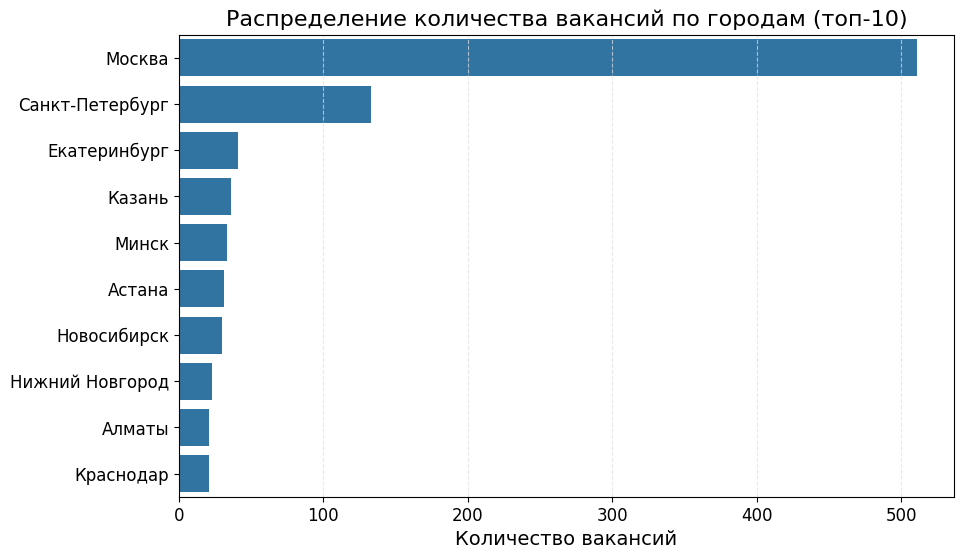

In [126]:
hh_df.groupby('city').agg(
    vac_in_city = ('vac_id','count')
    ).reset_index().sort_values(by='vac_in_city', ascending=False).head(10)

sns.barplot(data=hh_df.groupby('city').agg(
    vac_in_city = ('vac_id','count')
    ).reset_index().sort_values(by='vac_in_city', ascending=False).head(10), y='city', x='vac_in_city', orient='h')

capture_figures('Распределение количества вакансий по городам (топ-10)', xlabel='Количество вакансий')
plt.show()

In [128]:
hh_df.sample(1)

,vac_id,vac_name,grade,city,geo,geo_city,published_at,archived,employer_id,emp_name,addres,is_accredited,is_trusted,salary_from,salary_to,currency,gross,mode_name,frequency,prof_role,schedule_name,insider_interview,response_letter_required,experience,key_skills,has_test,url,parsed_for_job,j_date
6,102579656,Бизнес-аналитик (информационные технологии),Middle,Москва,"[55.722537, 37.668507]","[55.625578, 37.6063916]",2025-06-25 16:52:56+03:00,0,4971283,Полная занятость,"Москва, Шарикоподшипниковская улица, 5",0,1,156600.0,208800.0,RUR,1,За месяц,,Бизнес-аналитик,Полный день,,0,От 3 до 6 лет,excel,0,https://hh.ru/vacancy/102579656,Бизнес-аналитик,2025-06-25


In [162]:
hh_df_copy = hh_df.copy(deep=True)
hh_df_copy = hh_df_copy[['vac_id','key_skills']]
hh_df_copy['key_skills_exploded'] = hh_df_copy.key_skills.str.split(';')
hh_df_copy = hh_df_copy.explode('key_skills_exploded', ignore_index=True)
hh_df_copy.groupby('key_skills_exploded').agg(
    vac_count = ('vac_id','count')
    ).reset_index().sort_values(by='vac_count', ascending=False).head(50)

,key_skills_exploded,vac_count
992,обучение,360
442,python,210
373,excel,209
284,SQL,170
999,ответственность,147
538,Бизнес-анализ,145
74,BPMN,137
398,jira,134
859,Системный анализ,133
438,power bi,129


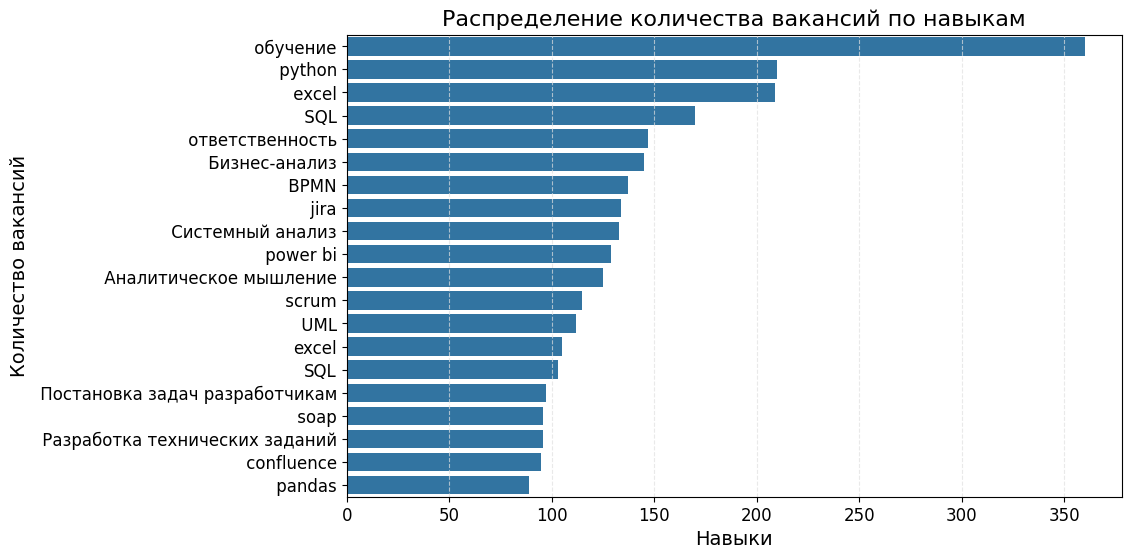

In [167]:
skill_rating = hh_df.key_skills.str.split(';').explode().value_counts().reset_index().head(20)
sns.barplot(data=skill_rating, y='key_skills', x='count')
capture_figures('Распределение количества вакансий по навыкам', xlabel='Навыки', ylabel='Количество вакансий')
plt.show()